In [196]:
from google.colab import files

# Creamos el objeto uploaded
uploaded = files.upload()

Saving season-1819_csv.csv to season-1819_csv (2).csv


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
#La base de datos muestra información sobre la Premier League, temporada 18-19. Nos acerca datos estadístico de todos los partidos de dicha temporada, como que equipos se
#enfretaron, quien fue local y quien visitante, quien ganó, cuantos goles hizo cada uno, etc. En base a esta información crearé la tabla de posiciones que incluye los puntos
#obtenidos, la catidad e partidos jugados, ganados, empatados y perdidos, los goles a favor y en contra y la diferencia de gol. Sobre el final incluiré algunos gráficos que
#ayuden a la comprensión de los datos más reelevantes.

# Levantamos el csv en formato DF usando pandas:
df = pd.read_csv(io.BytesIO(uploaded['season-1819_csv (2).csv']),encoding='latin-1',sep=",")
df.head(10) # vemos los 10 primeros registros

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89
5,E0,11/08/2018,Watford,Brighton,2,0,H,1,0,H,...,1.59,22,-0.25,2.07,2.01,1.90,1.86,2.58,3.08,3.22
6,E0,11/08/2018,Wolves,Everton,2,2,D,1,1,D,...,1.75,22,-0.25,2.04,1.98,1.92,1.88,2.44,3.23,3.32
7,E0,12/08/2018,Arsenal,Man City,0,2,A,0,1,A,...,2.42,20,0.75,1.78,1.74,2.21,2.15,4.43,4.13,1.81
8,E0,12/08/2018,Liverpool,West Ham,4,0,H,2,0,H,...,2.72,21,-1.75,1.95,1.90,2.06,1.97,1.25,6.95,12.00
9,E0,12/08/2018,Southampton,Burnley,0,0,D,0,0,D,...,1.60,20,-0.75,2.19,2.11,1.82,1.76,2.03,3.19,4.65


In [198]:
#Con el método shape vemos la cantidad de filas y columnas del DataFrame
df.shape

(380, 62)

In [199]:
#Con el método columns identificamos todas las columnas.
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD',
       'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [200]:
#Utilizamos el método drop para eliminar las columnas que vemos inncesarias para nuestro análisis.
df.drop(['BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA',
       'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'], axis = 'columns', inplace=True)
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,8,2,5,2,1,0,0,1.57,3.9,7.50
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,9,7,4,1,1,0,0,1.90,3.6,4.50
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,11,5,5,1,2,0,0,2.50,3.4,3.00
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,8,2,5,2,1,0,0,6.50,4.0,1.61
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,12,3,5,2,2,0,0,3.90,3.5,2.04


In [201]:
#Al comienzo es necesario saber si el DataFrame contiene datos nulos y el tipo de dato que se aloja en cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [202]:
#Vemos que la columna 'Date' contiene datos de tipo objeto y es recomendable que las fechas tengan un formato datetime para poder operar en periodos de tiempo que sucedan
#entre una fecha y otra. Po lo tanto haré la conversión.
from datetime import datetime as dt

In [203]:
df["Date"]

0      10/08/2018
1      11/08/2018
2      11/08/2018
3      11/08/2018
4      11/08/2018
          ...    
375    12/05/2019
376    12/05/2019
377    12/05/2019
378    12/05/2019
379    12/05/2019
Name: Date, Length: 380, dtype: object

In [204]:
#Creamos un formato
date='2023/12/11 12:00:00'
Date=pd.to_datetime(date, format='%Y/%m/%d %H:%M:%S')

In [205]:
#Convertimos date a datetime
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-205-dfb746708133>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [206]:
df["Date"]

0     2018-10-08
1     2018-11-08
2     2018-11-08
3     2018-11-08
4     2018-11-08
         ...    
375   2019-12-05
376   2019-12-05
377   2019-12-05
378   2019-12-05
379   2019-12-05
Name: Date, Length: 380, dtype: datetime64[ns]

# **Funciones**

In [207]:
#Empezaré creando una función que me permita obtener la cantidad de partidos que ganó cada equipo.
def Partidos_ganados(team_name):
    count_wins = 0
    for i, row in df.iterrows():
        if (row["HomeTeam"] == team_name and row["FTR"] == "H") or (row["AwayTeam"] == team_name and row["FTR"] == "A"):
            count_wins += 1
    return team_name, count_wins

In [208]:
team_results = []

teams = df["HomeTeam"].unique().tolist() + df["AwayTeam"].unique().tolist()

for team in set(teams):
    team_name, wins = Partidos_ganados(team)
    team_results.append((team_name, wins))

# Sort the list of tuples based on the number of wins (in descending order)
team_results.sort(key=lambda x: x[1], reverse=True)

# Print the results
for team_name, wins in team_results:
    print(f"{team_name} ganó {wins} partidos.")

Man City ganó 32 partidos.
Liverpool ganó 30 partidos.
Tottenham ganó 23 partidos.
Chelsea ganó 21 partidos.
Arsenal ganó 21 partidos.
Man United ganó 19 partidos.
Wolves ganó 16 partidos.
Everton ganó 15 partidos.
Leicester ganó 15 partidos.
West Ham ganó 15 partidos.
Crystal Palace ganó 14 partidos.
Watford ganó 14 partidos.
Bournemouth ganó 13 partidos.
Newcastle ganó 12 partidos.
Burnley ganó 11 partidos.
Cardiff ganó 10 partidos.
Brighton ganó 9 partidos.
Southampton ganó 9 partidos.
Fulham ganó 7 partidos.
Huddersfield ganó 3 partidos.


In [209]:
#Con la siguiente función veremos los puntos que obtuvieron los equipos, sumando 3 por cada victoria y 1 por los empates.
def Puntos_obtenidos(team_name):
    puntos = 0
    for i, row in df.iterrows():
        if (row["HomeTeam"] == team_name and row["FTR"] == "H") or (row["AwayTeam"] == team_name and row["FTR"] == "A"):
            puntos += 3
        elif (row["HomeTeam"] == team_name and row["FTR"] == "D") or (row["AwayTeam"] == team_name and row["FTR"] == "D"):
            puntos += 1
    return team_name, puntos

In [210]:
puntos_equipo = []

teams = df["HomeTeam"].unique().tolist() + df["AwayTeam"].unique().tolist()

for team in set(teams):
    team_name, puntos = Puntos_obtenidos(team)
    puntos_equipo.append((team_name, puntos))

# Ordeno la lista de tuplas en oreden desendiente en base a los puntos obtenidos
puntos_equipo.sort(key=lambda x: x[1], reverse=True)

# Imprimo los resultados
for team_name, puntos in puntos_equipo:
    print(f"{team_name} obtuvo {puntos} puntos.")

Man City obtuvo 98 puntos.
Liverpool obtuvo 97 puntos.
Chelsea obtuvo 72 puntos.
Tottenham obtuvo 71 puntos.
Arsenal obtuvo 70 puntos.
Man United obtuvo 66 puntos.
Wolves obtuvo 57 puntos.
Everton obtuvo 54 puntos.
Leicester obtuvo 52 puntos.
West Ham obtuvo 52 puntos.
Watford obtuvo 50 puntos.
Crystal Palace obtuvo 49 puntos.
Newcastle obtuvo 45 puntos.
Bournemouth obtuvo 45 puntos.
Burnley obtuvo 40 puntos.
Southampton obtuvo 39 puntos.
Brighton obtuvo 36 puntos.
Cardiff obtuvo 34 puntos.
Fulham obtuvo 26 puntos.
Huddersfield obtuvo 16 puntos.


In [211]:
#Empezaré a construir la tabla de posiciones que es el objetivo de este trabajo. Primero, en la columna 'Equipo' incuiré a todos los equipos participantes, ordenados según los
#los puntos obtenidos que se muestran en la columna 'Puntos'.
df1 = pd.DataFrame(puntos_equipo, columns=['Equipo', 'Puntos'])
df1

,Equipo,Puntos
0,Man City,98
1,Liverpool,97
2,Chelsea,72
3,Tottenham,71
4,Arsenal,70
5,Man United,66
6,Wolves,57
7,Everton,54
8,Leicester,52
9,West Ham,52


In [212]:
#Creé un nuevo DataFrame para mostrar los partidos que ganó cada equipo cuyo dato obtuvimos en primer lugar.
df2 = pd.DataFrame(team_results, columns=['Equipo', 'PG'])
df2

,Equipo,PG
0,Man City,32
1,Liverpool,30
2,Tottenham,23
3,Chelsea,21
4,Arsenal,21
5,Man United,19
6,Wolves,16
7,Everton,15
8,Leicester,15
9,West Ham,15


In [213]:
# Fusiono los DataFrames siguiendo el orden de df1 y muestro el DataFrame resultante
result_df = pd.merge(df1, df2, on='Equipo', how='left')
result_df

,Equipo,Puntos,PG
0,Man City,98,32
1,Liverpool,97,30
2,Chelsea,72,21
3,Tottenham,71,23
4,Arsenal,70,21
5,Man United,66,19
6,Wolves,57,16
7,Everton,54,15
8,Leicester,52,15
9,West Ham,52,15


In [214]:
#Calculo la cantidad de partidos empatados y lo sumo a la tabla de posiciones de la misma manera.
def Partidos_empatados(team_name):
    count_draw = 0
    for i, row in df.iterrows():
        if (row["HomeTeam"] == team_name and row["FTR"] == "D") or (row["AwayTeam"] == team_name and row["FTR"] == "D"):
            count_draw += 1
    return team_name, count_draw

In [215]:
team_results = []

teams = df["HomeTeam"].unique().tolist() + df["AwayTeam"].unique().tolist()

for team in set(teams):
    team_name, draw = Partidos_empatados(team)
    team_results.append((team_name, draw))


# Imprimo los resultados
for team_name, draw in team_results:
    print(f"{team_name} empató {draw} partidos.")

Huddersfield empató 7 partidos.
Brighton empató 9 partidos.
Everton empató 9 partidos.
Newcastle empató 9 partidos.
Man City empató 2 partidos.
Burnley empató 7 partidos.
Chelsea empató 9 partidos.
Leicester empató 7 partidos.
Man United empató 9 partidos.
Liverpool empató 7 partidos.
Cardiff empató 4 partidos.
Crystal Palace empató 7 partidos.
Bournemouth empató 6 partidos.
Watford empató 8 partidos.
Fulham empató 5 partidos.
Southampton empató 12 partidos.
Tottenham empató 2 partidos.
Arsenal empató 7 partidos.
West Ham empató 7 partidos.
Wolves empató 9 partidos.


In [216]:
df3 = pd.DataFrame(team_results, columns=['Equipo', 'PE'])
df3

,Equipo,PE
0,Huddersfield,7
1,Brighton,9
2,Everton,9
3,Newcastle,9
4,Man City,2
5,Burnley,7
6,Chelsea,9
7,Leicester,7
8,Man United,9
9,Liverpool,7


In [217]:
result_df = pd.merge(result_df, df3, on='Equipo', how='left')
result_df

,Equipo,Puntos,PG,PE
0,Man City,98,32,2
1,Liverpool,97,30,7
2,Chelsea,72,21,9
3,Tottenham,71,23,2
4,Arsenal,70,21,7
5,Man United,66,19,9
6,Wolves,57,16,9
7,Everton,54,15,9
8,Leicester,52,15,7
9,West Ham,52,15,7


In [218]:
def Partidos_perdidos(team_name):
    count_lost = 0
    for i, row in df.iterrows():
        if (row["HomeTeam"] == team_name and row["FTR"] == "A") or (row["AwayTeam"] == team_name and row["FTR"] == "H"):
            count_lost += 1
    return team_name, count_lost

In [219]:
team_results = []

teams = df["HomeTeam"].unique().tolist() + df["AwayTeam"].unique().tolist()

for team in set(teams):
    team_name, lost = Partidos_perdidos(team)
    team_results.append((team_name, lost))

# Sort the list of tuples based on the number of wins (in descending order)
team_results.sort(key=lambda x: x[1], reverse=True)

# Print the results
for team_name, lost in team_results:
    print(f"{team_name} perdió {lost} partidos.")

Huddersfield perdió 28 partidos.
Fulham perdió 26 partidos.
Cardiff perdió 24 partidos.
Brighton perdió 20 partidos.
Burnley perdió 20 partidos.
Bournemouth perdió 19 partidos.
Newcastle perdió 17 partidos.
Crystal Palace perdió 17 partidos.
Southampton perdió 17 partidos.
Leicester perdió 16 partidos.
Watford perdió 16 partidos.
West Ham perdió 16 partidos.
Everton perdió 14 partidos.
Tottenham perdió 13 partidos.
Wolves perdió 13 partidos.
Man United perdió 10 partidos.
Arsenal perdió 10 partidos.
Chelsea perdió 8 partidos.
Man City perdió 4 partidos.
Liverpool perdió 1 partidos.


In [220]:
df4 = pd.DataFrame(team_results, columns=['Equipo', 'PP'])
df4

,Equipo,PP
0,Huddersfield,28
1,Fulham,26
2,Cardiff,24
3,Brighton,20
4,Burnley,20
5,Bournemouth,19
6,Newcastle,17
7,Crystal Palace,17
8,Southampton,17
9,Leicester,16


In [221]:
# Fusionar los DataFrames siguiendo el orden de result_df
result_df = pd.merge(result_df, df4, on='Equipo', how='left')

# Mostrar el DataFrame resultante
print(result_df)

            Equipo  Puntos  PG  PE  PP
0         Man City      98  32   2   4
1        Liverpool      97  30   7   1
2          Chelsea      72  21   9   8
3        Tottenham      71  23   2  13
4          Arsenal      70  21   7  10
5       Man United      66  19   9  10
6           Wolves      57  16   9  13
7          Everton      54  15   9  14
8        Leicester      52  15   7  16
9         West Ham      52  15   7  16
10         Watford      50  14   8  16
11  Crystal Palace      49  14   7  17
12       Newcastle      45  12   9  17
13     Bournemouth      45  13   6  19
14         Burnley      40  11   7  20
15     Southampton      39   9  12  17
16        Brighton      36   9   9  20
17         Cardiff      34  10   4  24
18          Fulham      26   7   5  26
19    Huddersfield      16   3   7  28


In [222]:
def Partidos_jugados(team_name):
    count_play = df[df.eq(team_name).any(axis=1)].shape[0]
    return team_name, count_play

In [223]:
team_results = []

teams = df["HomeTeam"].unique().tolist() + df["AwayTeam"].unique().tolist()

for team in set(teams):
    team_name, play = Partidos_jugados(team)
    team_results.append((team_name, play))

# Print the results
for team_name, play in team_results:
    print(f"{team_name} jugó {play} partidos.")

Huddersfield jugó 38 partidos.
Brighton jugó 38 partidos.
Everton jugó 38 partidos.
Newcastle jugó 38 partidos.
Man City jugó 38 partidos.
Burnley jugó 38 partidos.
Chelsea jugó 38 partidos.
Leicester jugó 38 partidos.
Man United jugó 38 partidos.
Liverpool jugó 38 partidos.
Cardiff jugó 38 partidos.
Crystal Palace jugó 38 partidos.
Bournemouth jugó 38 partidos.
Watford jugó 38 partidos.
Fulham jugó 38 partidos.
Southampton jugó 38 partidos.
Tottenham jugó 38 partidos.
Arsenal jugó 38 partidos.
West Ham jugó 38 partidos.
Wolves jugó 38 partidos.


In [224]:
df5 = pd.DataFrame(team_results, columns=['Equipo', 'PJ'])
df5

,Equipo,PJ
0,Huddersfield,38
1,Brighton,38
2,Everton,38
3,Newcastle,38
4,Man City,38
5,Burnley,38
6,Chelsea,38
7,Leicester,38
8,Man United,38
9,Liverpool,38


In [225]:
# Fusionar los DataFrames siguiendo el orden de result_df
result_df = pd.merge(result_df, df5, on='Equipo', how='left')

# Mostrar el DataFrame resultante
print(result_df)

            Equipo  Puntos  PG  PE  PP  PJ
0         Man City      98  32   2   4  38
1        Liverpool      97  30   7   1  38
2          Chelsea      72  21   9   8  38
3        Tottenham      71  23   2  13  38
4          Arsenal      70  21   7  10  38
5       Man United      66  19   9  10  38
6           Wolves      57  16   9  13  38
7          Everton      54  15   9  14  38
8        Leicester      52  15   7  16  38
9         West Ham      52  15   7  16  38
10         Watford      50  14   8  16  38
11  Crystal Palace      49  14   7  17  38
12       Newcastle      45  12   9  17  38
13     Bournemouth      45  13   6  19  38
14         Burnley      40  11   7  20  38
15     Southampton      39   9  12  17  38
16        Brighton      36   9   9  20  38
17         Cardiff      34  10   4  24  38
18          Fulham      26   7   5  26  38
19    Huddersfield      16   3   7  28  38


In [226]:
result_df = result_df[['Equipo', 'PJ', 'Puntos', 'PG', 'PE', 'PP']]
result_df

,Equipo,PJ,Puntos,PG,PE,PP
0,Man City,38,98,32,2,4
1,Liverpool,38,97,30,7,1
2,Chelsea,38,72,21,9,8
3,Tottenham,38,71,23,2,13
4,Arsenal,38,70,21,7,10
5,Man United,38,66,19,9,10
6,Wolves,38,57,16,9,13
7,Everton,38,54,15,9,14
8,Leicester,38,52,15,7,16
9,West Ham,38,52,15,7,16


In [227]:
# Creo un diccionario para almacenar los contadores de goles por equipo
goles_por_equipo = {}

# Itero sobre las filas del DataFrame
for index, row in df.iterrows():
    # Obtengo el nombre del equipo de casa y de fuera, y la cantidad de goles de cada uno
    equipo_local = row['HomeTeam']
    equipo_visitante = row['AwayTeam']
    goles_local = row['FTHG']
    goles_visitante = row['FTAG']

    # Actualizo el contador para el equipo local
    goles_por_equipo[equipo_local] = goles_por_equipo.get(equipo_local, 0) + goles_local

    # Actualizo el contador para el equipo visitante
    goles_por_equipo[equipo_visitante] = goles_por_equipo.get(equipo_visitante, 0) + goles_visitante

# Convierto el diccionario a un DataFrame para una mejor visualización
goles_df = pd.DataFrame(list(goles_por_equipo.items()), columns=['Equipo', 'GF'])

# Muestro el DataFrame resultante
goles_df

,Equipo,GF
0,Man United,65
1,Leicester,51
2,Bournemouth,56
3,Cardiff,34
4,Fulham,34
5,Crystal Palace,51
6,Huddersfield,22
7,Chelsea,63
8,Newcastle,42
9,Tottenham,67


In [228]:
# Fusiono los DataFrames siguiendo el orden de result_df
result_df = pd.merge(result_df, goles_df, on='Equipo', how='left')

# Muestro el DataFrame resultante
result_df

,Equipo,PJ,Puntos,PG,PE,PP,GF
0,Man City,38,98,32,2,4,95
1,Liverpool,38,97,30,7,1,89
2,Chelsea,38,72,21,9,8,63
3,Tottenham,38,71,23,2,13,67
4,Arsenal,38,70,21,7,10,73
5,Man United,38,66,19,9,10,65
6,Wolves,38,57,16,9,13,47
7,Everton,38,54,15,9,14,54
8,Leicester,38,52,15,7,16,51
9,West Ham,38,52,15,7,16,52


In [229]:
#De la misma forma, obtengo los goles que recibió cada equipo.

# Creo un diccionario para almacenar los contadores de goles por equipo
goles_al_equipo = {}

# Itero sobre las filas del DataFrame
for index, row in df.iterrows():
    # Obtengo el nombre del equipo de casa y de fuera, y la cantidad de goles de cada uno
    equipo_local = row['HomeTeam']
    equipo_visitante = row['AwayTeam']
    goles_local = row['FTHG']
    goles_visitante = row['FTAG']

    # Actualo el contador para el equipo local
    goles_al_equipo[equipo_local] = goles_al_equipo.get(equipo_local, 0) + goles_visitante

    # Actualizo el contador para el equipo visitante
    goles_al_equipo[equipo_visitante] = goles_al_equipo.get(equipo_visitante, 0) + goles_local

# Convierto el diccionario a un DataFrame para una mejor visualización
goles_df = pd.DataFrame(list(goles_al_equipo.items()), columns=['Equipo', 'GC'])

# Muestro el DataFrame resultante
goles_df

,Equipo,GC
0,Man United,54
1,Leicester,48
2,Bournemouth,70
3,Cardiff,69
4,Fulham,81
5,Crystal Palace,53
6,Huddersfield,76
7,Chelsea,39
8,Newcastle,48
9,Tottenham,39


In [230]:
# Fusionao los DataFrames siguiendo el orden de result_df
result_df = pd.merge(result_df, goles_df, on='Equipo', how='left')

# Muestro el DataFrame resultante
result_df

,Equipo,PJ,Puntos,PG,PE,PP,GF,GC
0,Man City,38,98,32,2,4,95,23
1,Liverpool,38,97,30,7,1,89,22
2,Chelsea,38,72,21,9,8,63,39
3,Tottenham,38,71,23,2,13,67,39
4,Arsenal,38,70,21,7,10,73,51
5,Man United,38,66,19,9,10,65,54
6,Wolves,38,57,16,9,13,47,46
7,Everton,38,54,15,9,14,54,46
8,Leicester,38,52,15,7,16,51,48
9,West Ham,38,52,15,7,16,52,55


In [231]:
# Creo una nueva columna que sea la resta de goles a favor menos goles en contra
result_df['DG'] = result_df['GF'] - result_df['GC']
result_df

,Equipo,PJ,Puntos,PG,PE,PP,GF,GC,DG
0,Man City,38,98,32,2,4,95,23,72
1,Liverpool,38,97,30,7,1,89,22,67
2,Chelsea,38,72,21,9,8,63,39,24
3,Tottenham,38,71,23,2,13,67,39,28
4,Arsenal,38,70,21,7,10,73,51,22
5,Man United,38,66,19,9,10,65,54,11
6,Wolves,38,57,16,9,13,47,46,1
7,Everton,38,54,15,9,14,54,46,8
8,Leicester,38,52,15,7,16,51,48,3
9,West Ham,38,52,15,7,16,52,55,-3


# **Gráficos**

<ipython-input-232-b37e168fa5cd>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result_df['Equipo'], rotation=45, ha='right')  # Rotar los nombres


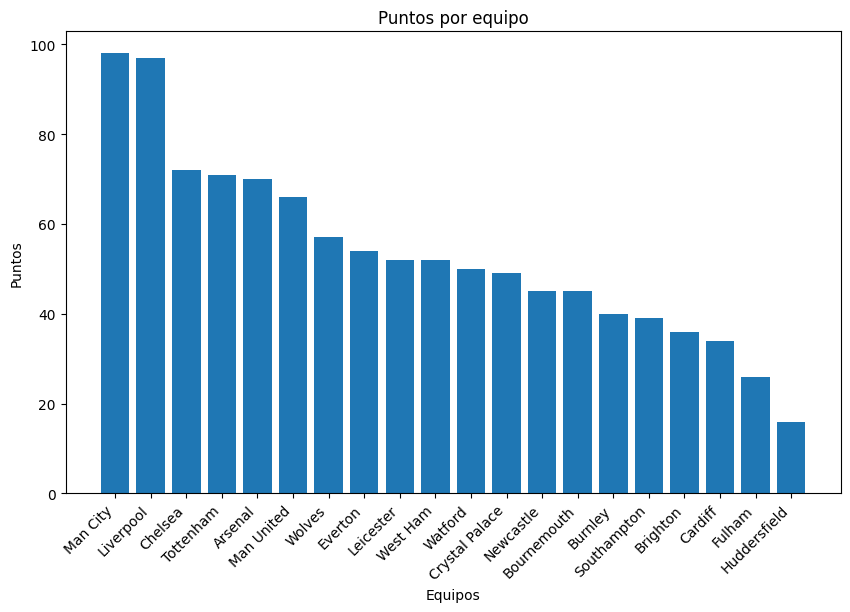

In [232]:
#En un gráfico de barras se hace notoria lo peleado que fue el campeonato hasta el final y la diferencia que los dos primero equipos obtuvieron respecto al resto.

# Gráfico de barras con nombres rotados
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x=result_df['Equipo'], height=result_df['Puntos'])
ax.set_xticklabels(result_df['Equipo'], rotation=45, ha='right')  # Rotar los nombres
ax.set_xlabel('Equipos')
ax.set_ylabel('Puntos')
ax.set_title('Puntos por equipo')
plt.show()

<ipython-input-233-2fdfbb354b55>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(result_df['Equipo'], rotation=45, ha='right')  # Rotar los nombres


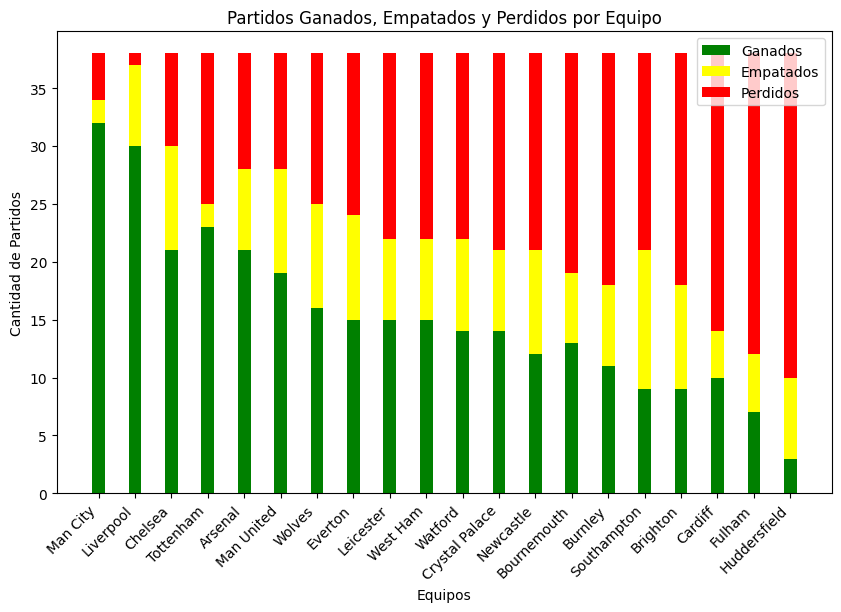

In [233]:
# Datos
equipos = result_df['Equipo']
partidos_ganados = result_df['PG']
partidos_empatados = result_df['PE']
partidos_perdidos = result_df['PP']

# Creo una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Creo barras apiladas
bar_width = 0.35
bar_positions = np.arange(len(equipos))

ax.bar(bar_positions, partidos_ganados, width=bar_width, label='Ganados', color='green')
ax.bar(bar_positions, partidos_empatados, width=bar_width, label='Empatados', color='yellow', bottom=partidos_ganados)
ax.bar(bar_positions, partidos_perdidos, width=bar_width, label='Perdidos', color='red', bottom=np.array(partidos_ganados) + np.array(partidos_empatados))

# Añado etiquetas y título
ax.set_xticklabels(result_df['Equipo'], rotation=45, ha='right')  # Rotar los nombres
ax.set_xlabel('Equipos')
ax.set_ylabel('Cantidad de Partidos')
ax.set_title('Partidos Ganados, Empatados y Perdidos por Equipo')
ax.set_xticks(bar_positions)
ax.set_xticklabels(equipos)
ax.legend()

# Muestro el gráfico
plt.show()

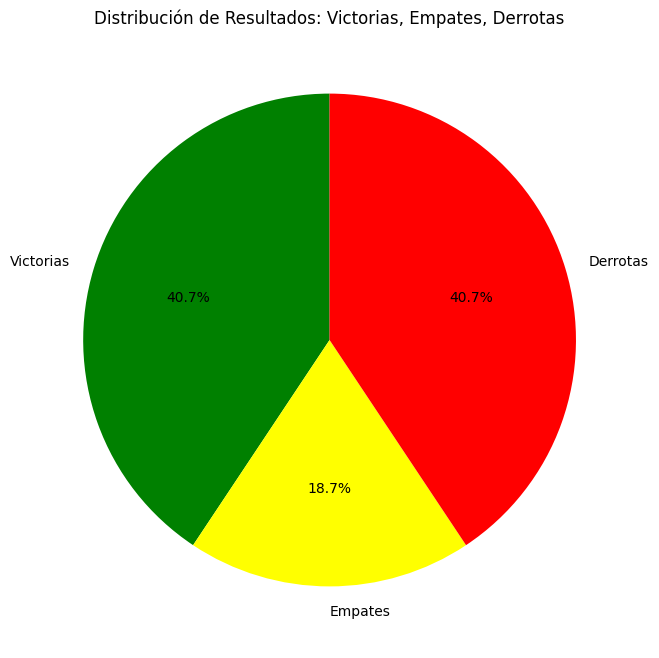

In [234]:
# Datos
victorias = result_df['PG'] # Cantidad de victorias por equipo
empates = result_df['PE']     # Cantidad de empates por equipo
derrotas = result_df['PP']     # Cantidad de derrotas por equipo

# Etiquetas para cada sección de la torta
etiquetas = ['Victorias', 'Empates', 'Derrotas']

# Creo el diagrama de torta
plt.figure(figsize=(8, 8))
plt.pie([sum(victorias), sum(empates), sum(derrotas)], labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow', 'red'])

# Añado título
plt.title('Distribución de Resultados: Victorias, Empates, Derrotas')

# Muestro el diagrama de torta
plt.show()

# **Correlación**

In [235]:
#Como veremos al analizar la matriz de correlación los datos están muy relacionados entre si, lo cual es intuitivo ya que todos sabemos como los partidos ganados y los
#goles a favor confabulan para que un equipo obtenga más puntos. Mostraré la relación que hay entre los goles recibidos y los partidos perdidos, una relación fuerte y positiva
#que se ve aún mejor en ul gráfico de dipersión.

In [236]:
#Para el análisis de correlación quité la columna partidos jugados ya que a lo largo de un torneo todos los equipos juegan la misma cantidad de partidos por lo cual
#la desviación es 0.
result_df_sin_pj = result_df.drop(columns=['PJ'])

In [237]:
#Matriz de Varianzas y Covarianzas
matriz_correlacion = result_df_sin_pj.corr()
matriz_correlacion

<ipython-input-237-d64cb25cb2ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = result_df_sin_pj.corr()


,Puntos,PG,PE,PP,GF,GC,DG
Puntos,1.000000,0.994055,-0.251731,-0.972488,0.971112,-0.922043,0.990814
PG,0.994055,1.000000,-0.355612,-0.941341,0.971869,-0.907927,0.984367
PE,-0.251731,-0.355612,1.000000,0.019354,-0.302511,0.155360,-0.244479
PP,-0.972488,-0.941341,0.019354,1.000000,-0.930421,0.915149,-0.964743
GF,0.971112,0.971869,-0.302511,-0.930421,1.000000,-0.831100,0.962685
GC,-0.922043,-0.907927,0.155360,0.915149,-0.831100,1.000000,-0.950588
DG,0.990814,0.984367,-0.244479,-0.964743,0.962685,-0.950588,1.000000


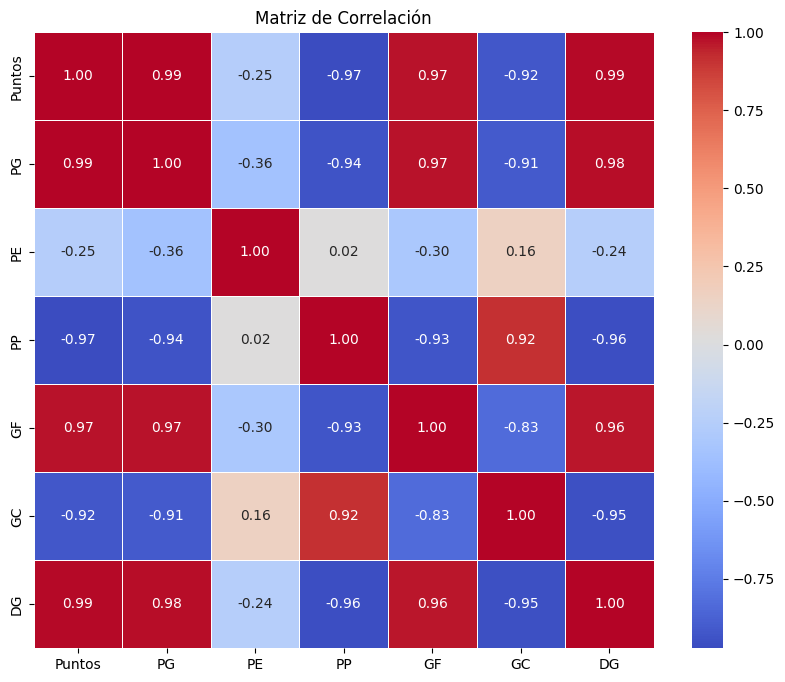

In [238]:
# Visualizar la matriz de correlación usando un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

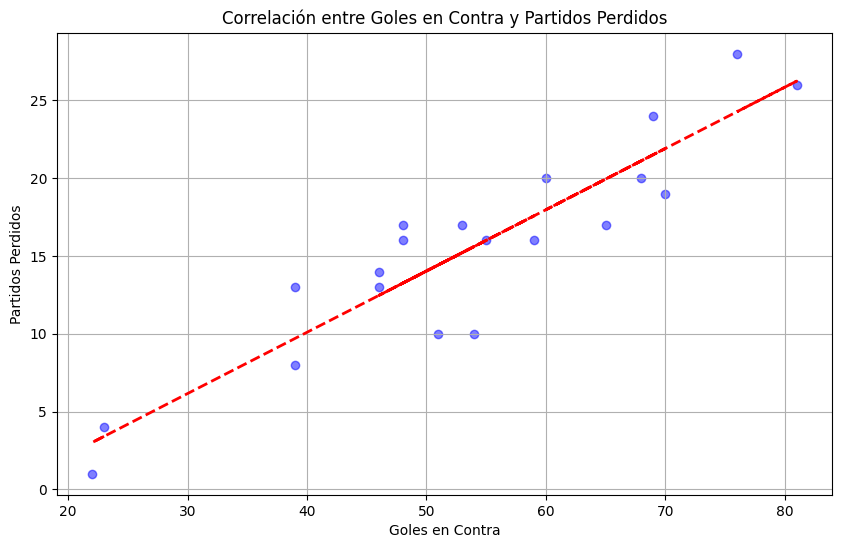

In [239]:
# Calcular la línea de regresión
coefs = np.polyfit(result_df['GC'], result_df['PP'], 1)
polinomio = np.poly1d(coefs)

# Graficar la correlación con un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(result_df['GC'], result_df['PP'], alpha=0.5, color='blue')
plt.plot(result_df['GC'], polinomio(result_df['GC']), color='red', linestyle='--', linewidth=2)
plt.title('Correlación entre Goles en Contra y Partidos Perdidos')
plt.xlabel('Goles en Contra')
plt.ylabel('Partidos Perdidos')
plt.grid(True)
plt.show()